In [1]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Scraper_Interview')
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/Scraper_Interview'

In [2]:
!pip install google-play-scraper

     |████████████████████████████████| 51kB 6.3MB/s 
  Created wheel for google-play-scraper: filename=google_play_scraper-0.2.1-cp37-none-any.whl size=22199 sha256=7085d9498df002ae94980eee8b5337d90493ec44f13705cd0a4377f3c7e3258e
  Stored in directory: /root/.cache/pip/wheels/9a/fe/59/aaed9c7885041da68908f5e45f2796bf77696ac83874afd02c
Successfully built google-play-scraper


In [3]:
from google_play_scraper import Sort, reviews_all
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [4]:
#Because of the Google Play Store limit (up to 200 reviews can be fetched at a time), http requests are generated as long as the number of app reviews is divided by 200. 
#For example, targeting an app like Zomato makes tens of thousands of http requests.

In [5]:
result = reviews_all(
    'com.application.zomato',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    filter_score_with=None # defaults to None(means all score)
)


In [6]:
df = pd.DataFrame(result)[['userName','content','score']]
df.columns = ['User Name','Review','Rating']
df.set_index(['User Name'],inplace = True,drop = True)
df

,Review,Rating
User Name,,
Event Wanderer,I've been using your services from quite long ...,1
somnath sarkar,"Previously it was a good application, but afte...",1
Ishani Mehta,It's an amazing app and I've not had any issue...,4
Harshitha J. M,This is such a bad app !! It'll have problem a...,1
Salman Salman,There's nothing safe in Zomato. I found small ...,1
...,...,...
A Google user,My experience with Zomato has been good so far...,3
Chandra Shekhar Singh,"Very poor service, customer service chat is a ...",1
A Google user,Worst service. The ordered should not be accep...,1


In [7]:
df.to_csv('Zomato_app_reviews.csv',index = False,header = True,encoding = 'utf-8')

In [10]:
df_loaded_csv = pd.read_csv('Zomato_app_reviews.csv')

In [12]:
df_loaded_csv

,Review,Rating
0,I've been using your services from quite long ...,1
1,"Previously it was a good application, but afte...",1
2,It's an amazing app and I've not had any issue...,4
3,This is such a bad app !! It'll have problem a...,1
4,There's nothing safe in Zomato. I found small ...,1
...,...,...
14522,My experience with Zomato has been good so far...,3
14523,"Very poor service, customer service chat is a ...",1
14524,Worst service. The ordered should not be accep...,1
14525,usually the experience of late has been Poor t...,2


In [13]:
df_highest_rated = df_loaded_csv[df_loaded_csv['Rating'] == 5]
df_highest_rated.head()

,Review,Rating
11,"Their live chat feature is helpful, but you ne...",5
20,"I love this app. I get reliable reviews, can s...",5
32,"Amazing app, with fast delivery services. I al...",5
36,"My review for Zomato has changed, on times it ...",5
47,Good app to order food. Though it would help i...,5


In [14]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df_highest_rated['Review']:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

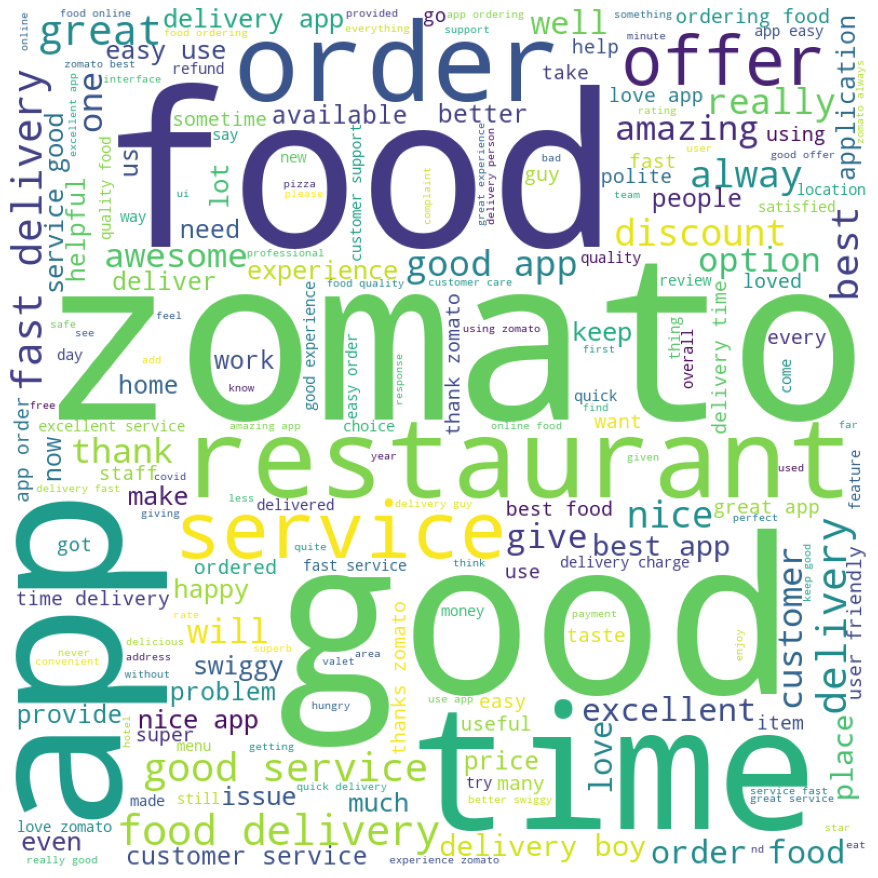

In [15]:
# plot the WordCloud image                       
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [16]:
df_lowest_rated = df_loaded_csv[df_loaded_csv['Rating'] == 1]
df_lowest_rated.head()

,Review,Rating
0,I've been using your services from quite long ...,1
1,"Previously it was a good application, but afte...",1
3,This is such a bad app !! It'll have problem a...,1
4,There's nothing safe in Zomato. I found small ...,1
5,"""Expected Time"" and actual delivery time are t...",1


In [17]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df_lowest_rated['Review']:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

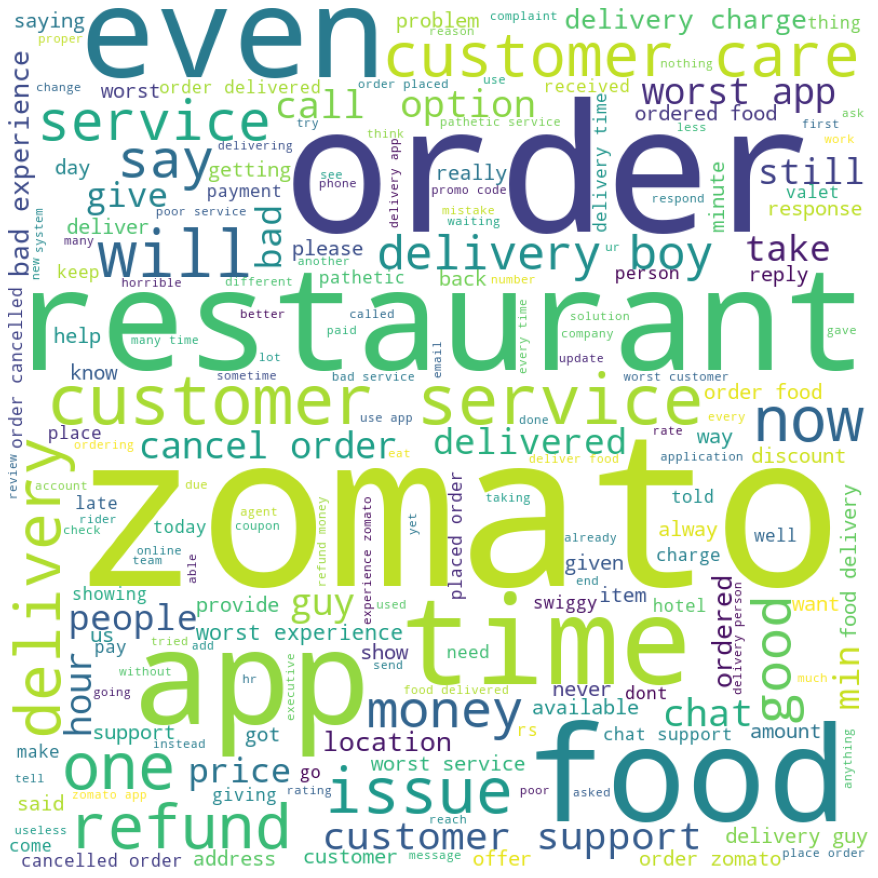

In [18]:
# plot the WordCloud image                       
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()